## https://medium.com/@yitonghuang/btc-price-prediction-by-rnn-b9bace39dc01


In [9]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [3]:
# Import the dataset and encode the date
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [4]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [5]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Using TensorFlow backend.


Epoch 1/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.1956
Epoch 2/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0418
Epoch 3/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0288
Epoch 4/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0271
Epoch 5/100
1148/1148 [==============================] - 2s 2ms/step - loss: 0.0254
Epoch 6/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0237
Epoch 7/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0218
Epoch 8/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0198
Epoch 9/100
1148/1148 [==============================] - 3s 2ms/step - loss: 0.0176
Epoch 10/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.0153
Epoch 11/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.0129
Epoch 12/100
1148/1148 [==============================] - 3s 3ms/step - lo

Epoch 94/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.4979e-04
Epoch 95/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.4798e-04
Epoch 96/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.4569e-04
Epoch 97/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.4941e-04
Epoch 98/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.4682e-04
Epoch 99/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.4477e-04
Epoch 100/100
1148/1148 [==============================] - 3s 2ms/step - loss: 1.5020e-04


In [7]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

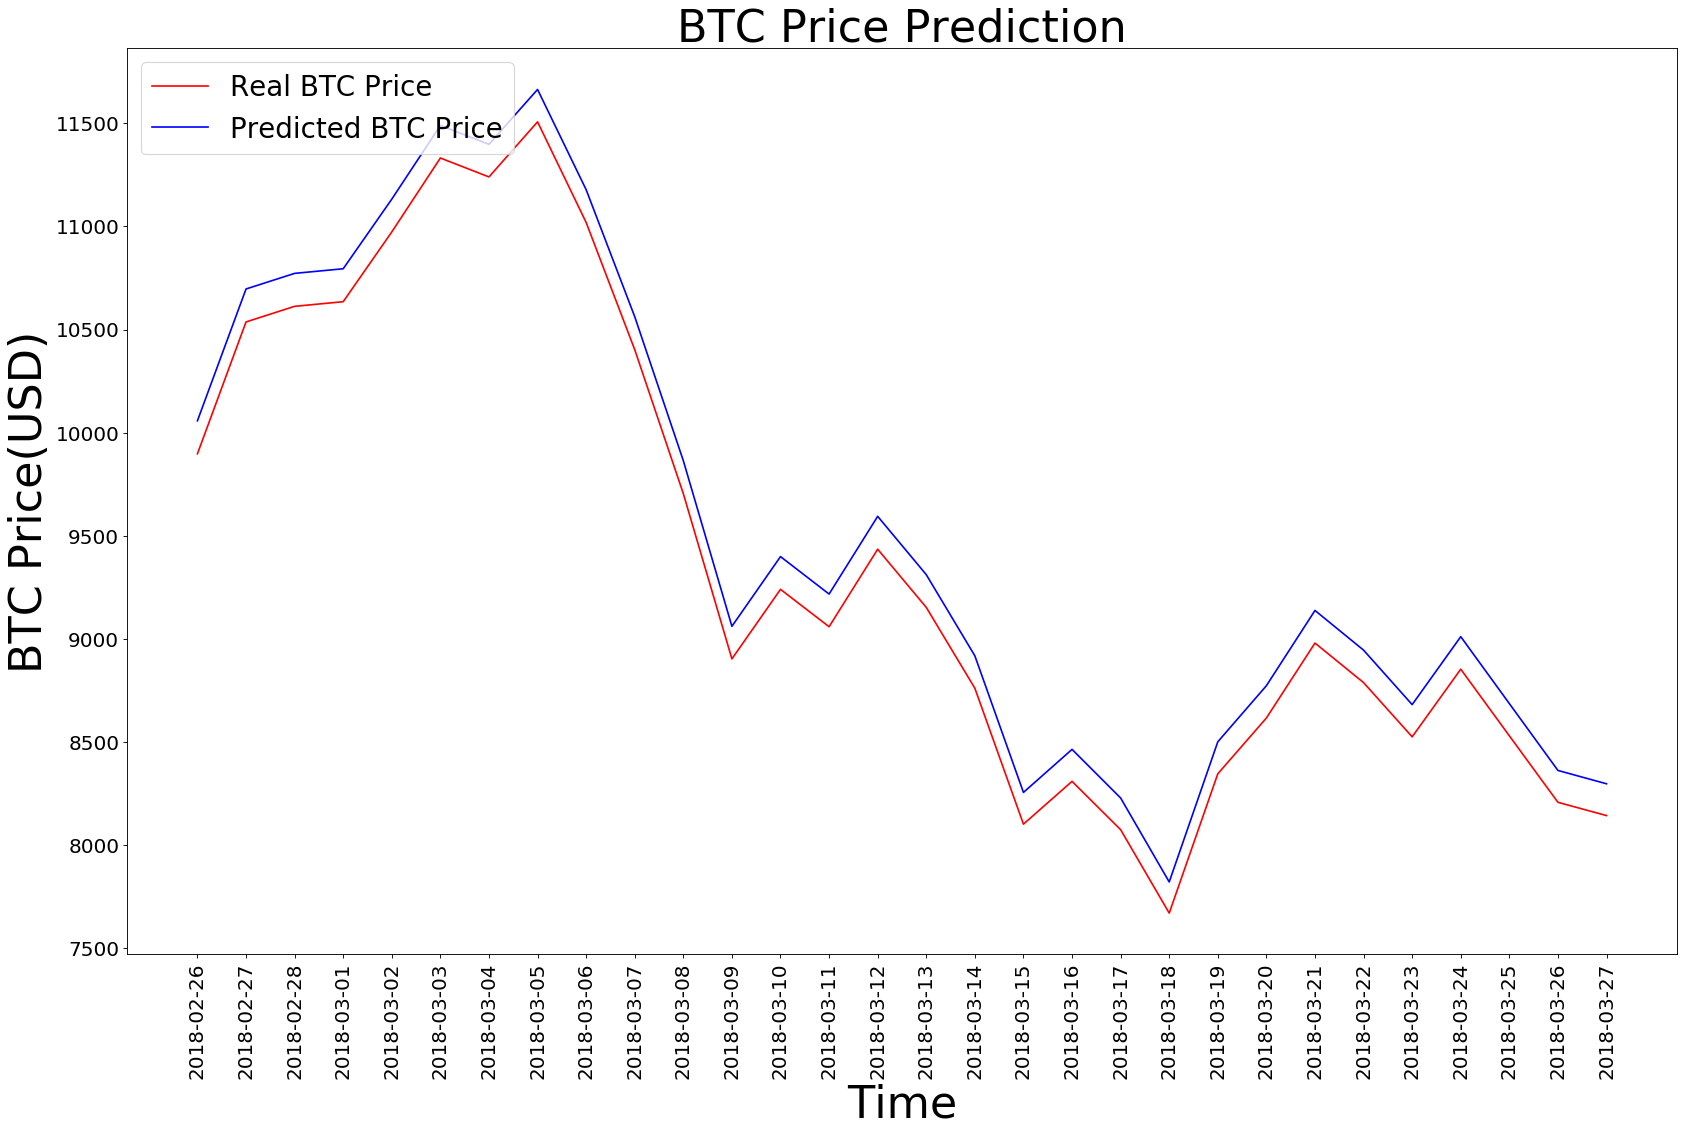

In [8]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()